In [149]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
chart_df = pd.read_pickle('NLP_df.pkl')
gdp_df = pd.read_csv('GDP.csv')

In [150]:
chart_df['chart_date'] = pd.to_datetime(chart_df.chart_date)
chart_df['date'] = chart_df.chart_date

In [151]:
gdp_df['DATE'] = pd.to_datetime(gdp_df.DATE)
gdp_df['date'] = gdp_df.DATE

In [152]:
df = chart_df.merge(right = gdp_df, how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21221 entries, 0 to 21220
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   chart_position     20952 non-null  float64       
 1   chart_date         20952 non-null  datetime64[ns]
 2   song               20952 non-null  object        
 3   performer          20952 non-null  object        
 4   song_id            20952 non-null  object        
 5   instance           20952 non-null  float64       
 6   time_on_chart      20952 non-null  float64       
 7   consecutive_weeks  20952 non-null  float64       
 8   previous_week      20952 non-null  float64       
 9   peak_position      20952 non-null  float64       
 10  worst_position     20952 non-null  float64       
 11  chart_debut        20952 non-null  datetime64[ns]
 12  chart_url          20952 non-null  object        
 13  lyrics             20952 non-null  object        
 14  sentim

In [153]:
df.columns

Index(['chart_position', 'chart_date', 'song', 'performer', 'song_id',
       'instance', 'time_on_chart', 'consecutive_weeks', 'previous_week',
       'peak_position', 'worst_position', 'chart_debut', 'chart_url', 'lyrics',
       'sentiment', 'date', 'DATE', 'GDP'],
      dtype='object')

In [154]:
df.drop(columns=
       ['chart_position', 'chart_date', 'song', 'performer', 'instance', 'time_on_chart', 'consecutive_weeks', 'previous_week',
       'peak_position', 'worst_position', 'chart_debut', 'chart_url',
       'DATE'],inplace=True
       )

In [155]:
df.set_index('date',inplace=True)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21221 entries, 1958-08-02 to 2022-07-01
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   song_id    20952 non-null  object 
 1   lyrics     20952 non-null  object 
 2   sentiment  20952 non-null  float64
 3   GDP        474 non-null    float64
dtypes: float64(2), object(2)
memory usage: 828.9+ KB


In [157]:
df['GDP_interp'] = df.GDP.interpolate(method='time')

In [158]:
df.drop(columns=['GDP'],inplace=True)

<AxesSubplot:xlabel='date'>

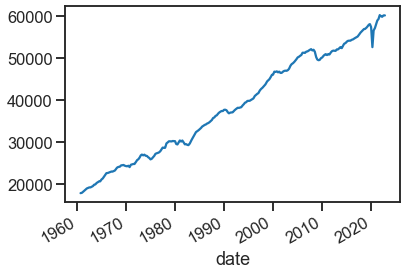

In [159]:
df.dropna(inplace=True)
df.GDP_interp.plot()

<AxesSubplot:xlabel='date'>

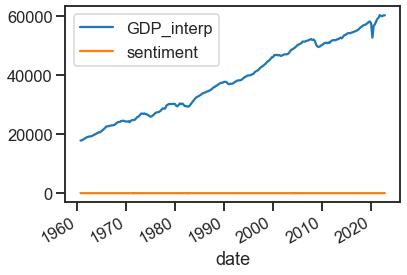

In [160]:
df.plot.line(y=['GDP_interp','sentiment'])

In [161]:
# df.reset_index(inplace=True)
# df.set_index('chart_date',inplace=True,drop=False)

In [162]:
df = df.merge(right = pd.read_pickle('Hot100'),how='right',on='song_id').dropna()


In [163]:
df.drop(columns=
       ['chart_position', 'song', 'performer', 'instance', 'time_on_chart', 'consecutive_weeks', 'previous_week',
       'peak_position', 'worst_position', 'chart_debut', 'chart_url'],inplace=True
       )
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232647 entries, 11309 to 335193
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   song_id     232647 non-null  object        
 1   lyrics      232647 non-null  object        
 2   sentiment   232647 non-null  float64       
 3   GDP_interp  232647 non-null  float64       
 4   chart_date  232647 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 10.6+ MB


In [164]:
df

,song_id,lyrics,sentiment,GDP_interp,chart_date
11309,Shoppin' For ClothesThe Coasters,I was shopping for a suit the other day \nAnd ...,0.103254,17768.00000,1960-10-01
11330,My HeroThe Blue Notes,"Oh come, come\nI love you true\n\nCome, come\n...",0.265385,17768.00000,1960-10-01
11384,Just A LittleBrenda Lee,Brenda Lee\nMiscellaneous\nJust A Little\nJust...,0.107000,17768.00000,1960-10-01
11389,Love Walked InDinah Washington,Love walked right in and drove the shadows awa...,0.235372,17768.00000,1960-10-01
11394,StayMaurice Williams & The Zodiacs,"(Stay) Ah, just a little bit longer (Stay)\n(P...",0.183929,17768.00000,1960-10-01
...,...,...,...,...,...
335186,UnholySam Smith & Kim Petras,\nMummy don't know daddy's getting hot\nAt the...,0.127963,60082.00000,2022-10-22
335187,Last LastBurna Boy,"\nE don cast, last last, na everybody go chop ...",0.181122,60082.00000,2022-10-22
335190,Victoria’s SecretJax,"\nGod, I wish somebody would have told me when...",-0.096000,60082.00000,2022-10-22
335191,Fall In LoveBailey Zimmerman,\nHeard you moved out to South Carolina\nJust ...,0.204296,59859.89011,2022-10-22


In [165]:
agg_df = df.groupby('chart_date').mean()
agg_df['chart_date'] = agg_df.index

In [166]:
data.sentiment

chart_date
1960-10-01    0.178988
1960-10-08    0.235382
1960-10-15    0.171924
1960-10-22    0.161777
1960-10-29    0.135827
                ...   
2022-09-24    0.041054
2022-10-01    0.034105
2022-10-08    0.035308
2022-10-15    0.045645
2022-10-22    0.038386
Name: sentiment, Length: 3239, dtype: float64

In [167]:
data.sentiment.rolling(center=True,window=3).mean()

chart_date
1960-10-01         NaN
1960-10-08    0.195431
1960-10-15    0.189694
1960-10-22    0.156509
1960-10-29    0.141675
                ...   
2022-09-24    0.040395
2022-10-01    0.036823
2022-10-08    0.038353
2022-10-15    0.039780
2022-10-22         NaN
Name: sentiment, Length: 3239, dtype: float64

''

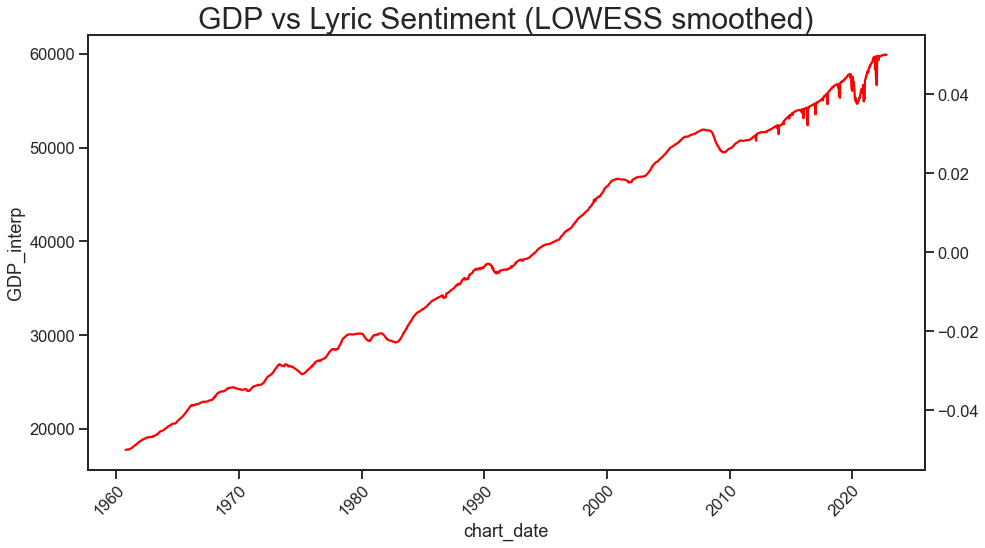

In [168]:
from loess.loess_1d import loess_1d
data = agg_df
data['rolling_sentiment'] = data.sentiment.rolling(center=True,window=26).mean()

xin = data.chart_date.astype('int64')/100000000000
yin = data['sentiment']
xout, yout, wout = loess_1d(xin.astype('int32').values, yin.values, degree=1, frac=0.2)
data['lowess_sentiment'] = pd.Series(yout)
x = 'chart_date'
data['GDP_diff'] = data['GDP_interp'].diff()#.rolling(center=True,window=26,closed='both',win_type='barthann',min_periods=1).mean()
y = 'GDP_diff'
y1='GDP_interp'
title_size = 30
label_size = 15
y2 = 'sentiment'
y3 = 'lowess_sentiment'

sns.set_context("talk")
fig, ax=plt.subplots(figsize=(15,8))
sns.set_style("ticks")
p = sns.lineplot(ax=ax, data=data, x=x, y=y1, color='r')
ax2 = plt.twinx()
q = sns.lineplot(ax=ax2, data=data, x=x, y=y3)
plt.setp(ax.get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')

# p.set_xlabel('String',fontsize=label_size)
# p.set_ylabel('String',fontsize=label_size)
p.set_title('GDP vs Lyric Sentiment (LOWESS smoothed)',fontsize=title_size)
;

''

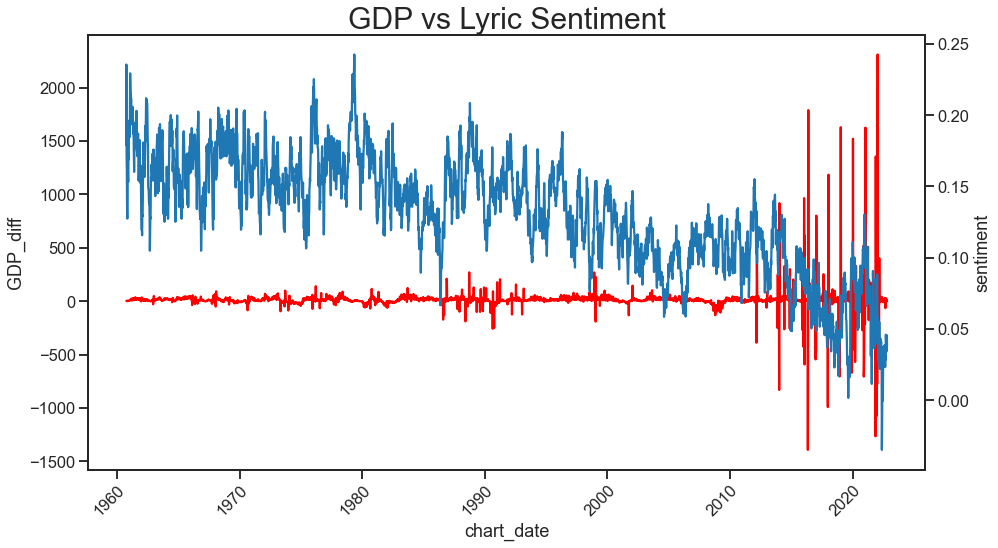

In [169]:
fig, ax=plt.subplots(figsize=(15,8))
sns.set_style("ticks")
p = sns.lineplot(ax=ax, data=data, x=x, y=y,color='r')
ax2 = plt.twinx()
r = sns.lineplot(ax=ax2, data=data, x=x, y=y2)
plt.setp(ax.get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')

# p.set_xlabel('String',fontsize=label_size)
# p.set_ylabel('String',fontsize=label_size)
p.set_title('GDP vs Lyric Sentiment',fontsize=title_size)
;

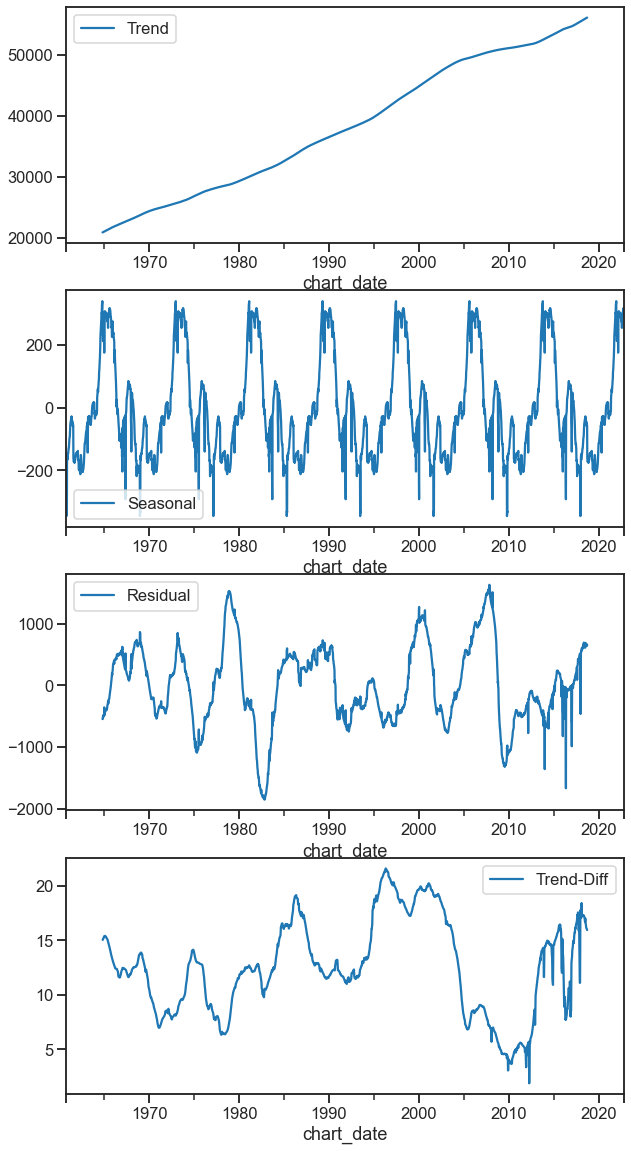

In [170]:
from statsmodels.tsa.seasonal import seasonal_decompose
datasource = data['GDP_interp'] ## your dataframe here
period =  426 ## size of window for running-mean smoothing
result = seasonal_decompose(datasource, period = period)
fig, ax = plt.subplots(4,1, figsize = (10,20))
result.trend.plot(ax = ax[0], label = 'Trend')
ax[0].legend()
result.seasonal.plot(ax = ax[1], label = 'Seasonal')
ax[1].legend()
result.resid.plot(ax = ax[2], label = 'Residual')
ax[2].legend()
result.trend.diff().plot(ax = ax[3], label='Trend-Diff')
ax[3].legend();

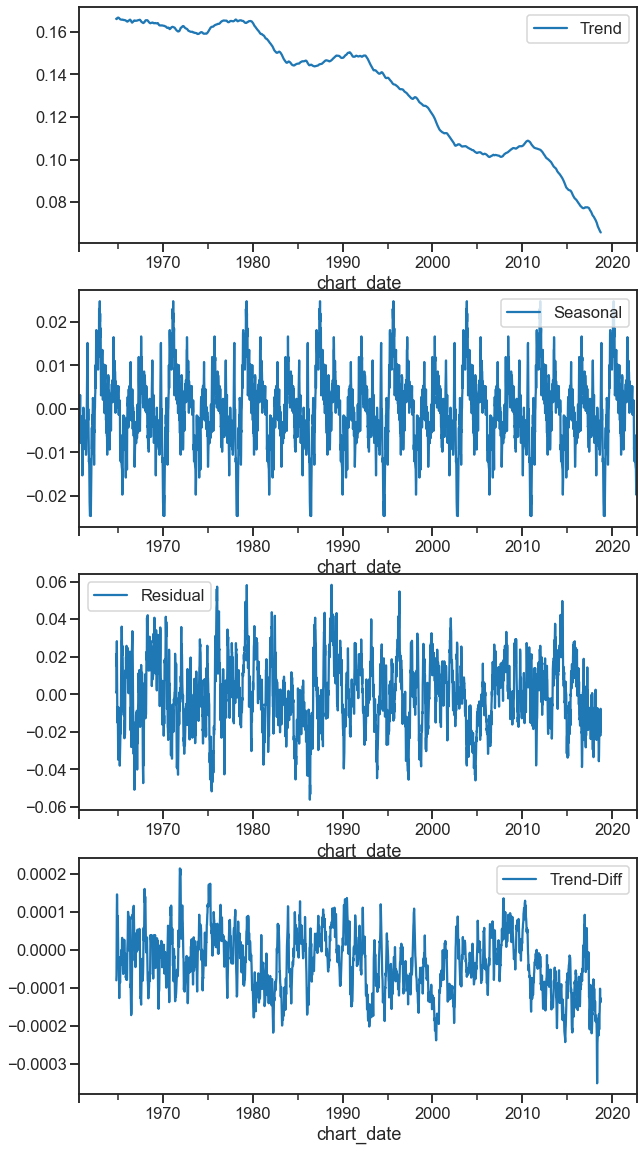

In [171]:
datasource = data['sentiment'] ## your dataframe here
period =  426 ## size of window for running-mean smoothing
result = seasonal_decompose(datasource, period = period)
fig, ax = plt.subplots(4,1, figsize = (10,20))
result.trend.plot(ax = ax[0], label = 'Trend')
ax[0].legend()
result.seasonal.plot(ax = ax[1], label = 'Seasonal')
ax[1].legend()
result.resid.plot(ax = ax[2], label = 'Residual')
ax[2].legend()
result.trend.diff().plot(ax = ax[3], label='Trend-Diff')
ax[3].legend();

In [173]:
export_df = agg_df.drop(columns=['rolling_sentiment','lowess_sentiment','GDP_diff'])
export_df.to_pickle('model_df.pkl')

<AxesSubplot:xlabel='chart_date'>

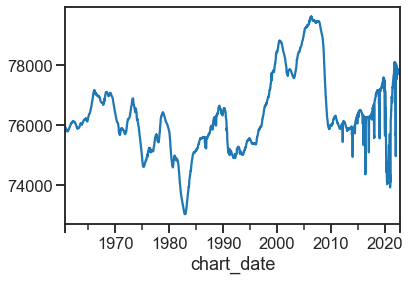

In [145]:
export_df['week_num'] = np.linspace(59913.335471/1.03,17768.000000,3239)
export_df['GDP_Stat'] = export_df.GDP_interp + export_df.week_num
export_df.GDP_Stat.plot()

In [146]:
from pandas.plotting import autocorrelation_plot
series = export_df.GDP_Stat

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

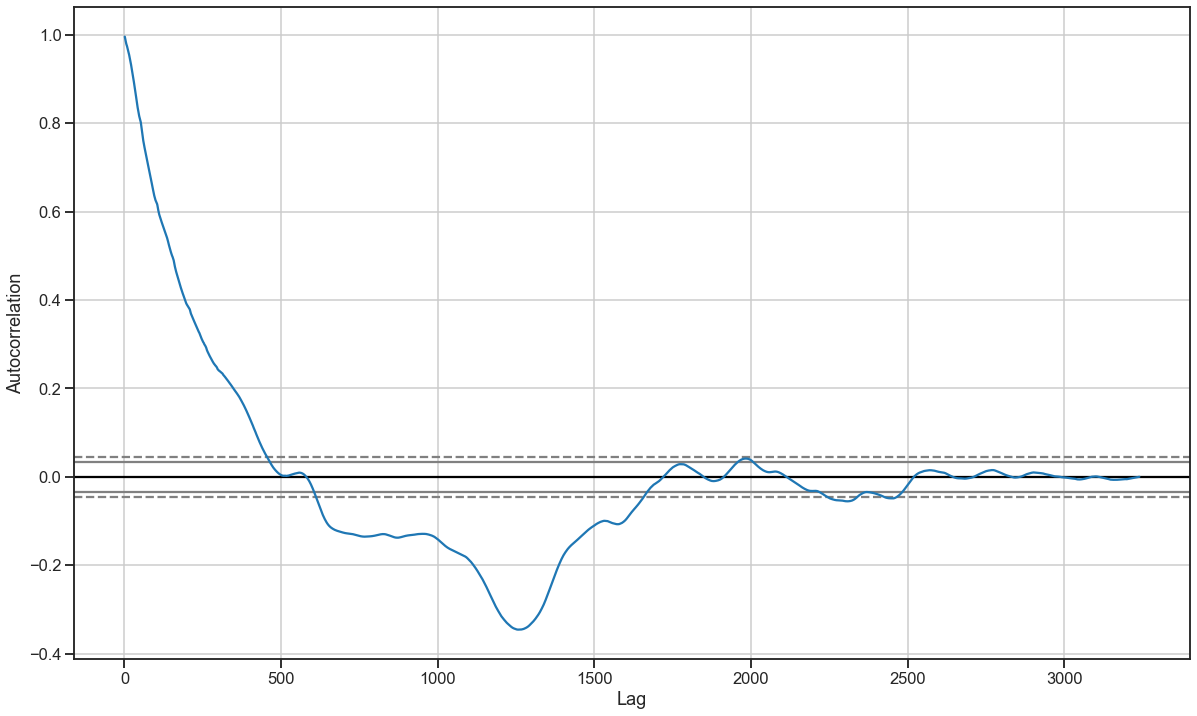

In [147]:
fig, ax = plt.subplots(figsize = (20,12))
autocorrelation_plot(series,ax=ax)